# Part I - Loans Data from Prosper Exploration
## by Milcah Maina

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), 
current loan status, borrower income, and several others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
df.shape

(113937, 81)

### What is the structure of your dataset?

> This dataset contains 113,937 rows and 81 columns. It therefore has multiple features that can be observed (81). Most of the data is numeric, although there is also some descriptive data. For example, the Loan Status provides information on whether or not a loan has been paid back in full. 

### What is/are the main feature(s) of interest in your dataset?

> This data evidently contains numerous features, most of which will not be explored. To start off, the main interests I have in this dataset is the interest rate, as well as the APR and the effect this may have on the Loan Amount borrowed  by customers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features in the dataset that may have influence on the APR include: Prosper Score, Employment Status. I'd also like to see the yield/return for each loan, in relation to the APR.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



First, let's observe the distribution of the loan status.

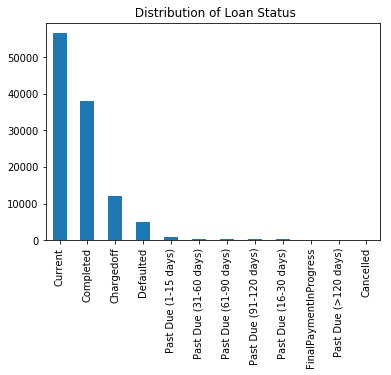

In [6]:
df['LoanStatus'].value_counts(sort = True).plot(kind='bar', color = sb.color_palette()[0], 
                                                title=' Distribution of Loan Status',)

Most loans are current or completed. Some of the variables that could have an effect on this include Employment Status and 
Income Range. We'll examine if these variables have an effect on the loan status later. 

Next, let's look at the income range for the customers.

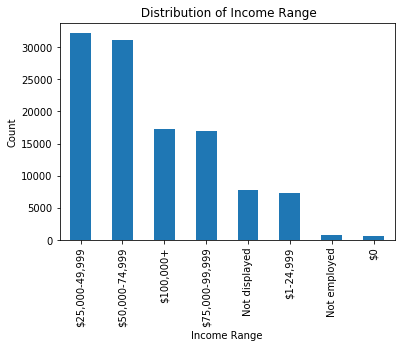

In [7]:
df['IncomeRange'].value_counts(sort = True).plot(kind='bar', color = sb.color_palette()[0], 
                                                title=' Distribution of Income Range',)
plt.xlabel('Income Range');
plt.ylabel('Count');

This is a relatively typical distribution. Most people earn between USD 25,000 - USD 50,000.
Again, we'll look into any correlation between this and features such as Loan Amounts taken, Loan Term, etc.

Let's observe the number of loans taken per state. 

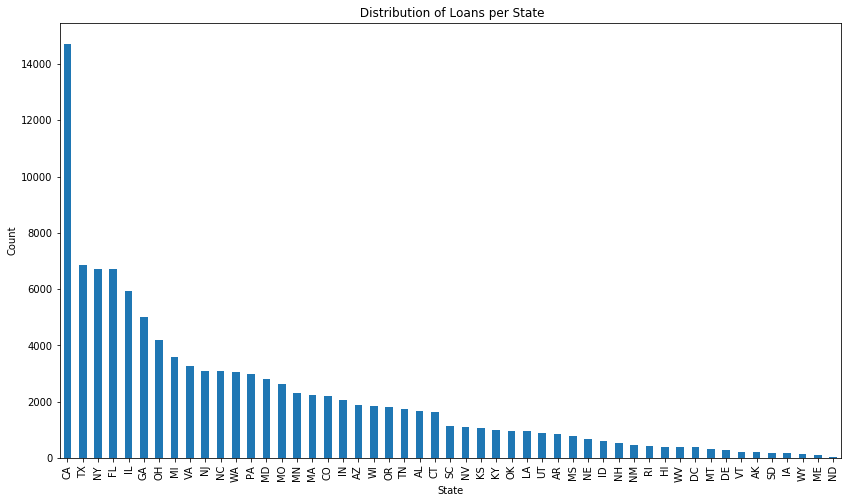

In [8]:
df['BorrowerState'].value_counts(sort = True).plot(kind='bar', color = sb.color_palette()[0], figsize = [14, 8],
                                                title=' Distribution of Loans per State',)
plt.xlabel('State');
plt.ylabel('Count');

It seems most borrowers come from California, Texas and New York. In the bivariate analysis section, I will examine the employment status and/or 
income range per state as this would be hepful in understanding if this could be reaso for the high amounts of borrowing in 
California, Texas, New York, etc.

It would be interesting to discover the distribution of occupations across the entire set of customers.

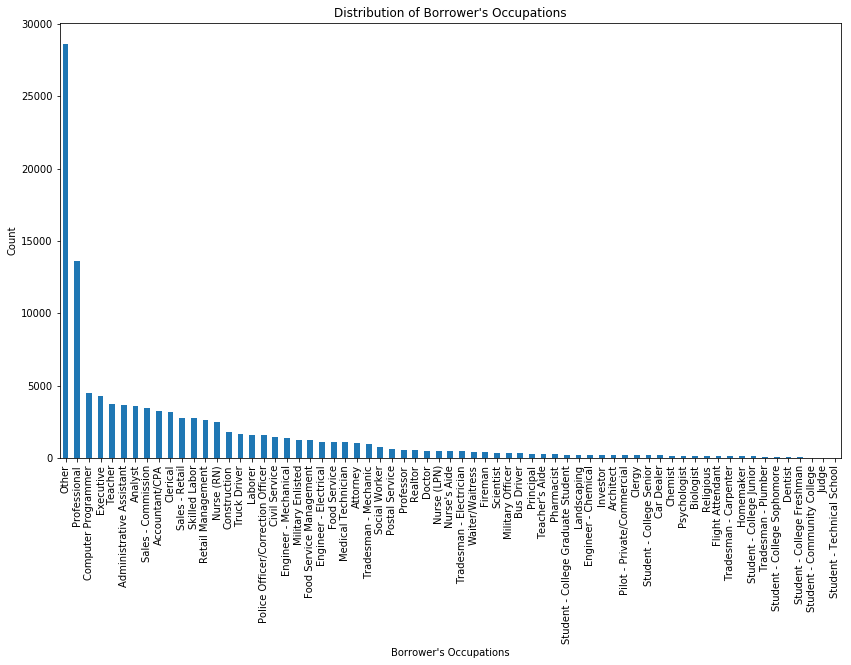

In [9]:
df['Occupation'].value_counts(sort = True).plot(kind='bar', color = sb.color_palette()[0], figsize = [14, 8], 
                                                title= "Distribution of Borrower's Occupations",)
plt.xlabel("Borrower's Occupations");
plt.ylabel('Count');

Wow. As the number of occupations is quite high, it may be difficult to obtain definitive correlations between this and other data.While it may be possible to further classify these occupations, we already have quite a large set of features which may provide more useful information. Let's proceed with our other variables for now.

Let's examine the estimated return for the loans borrowed.

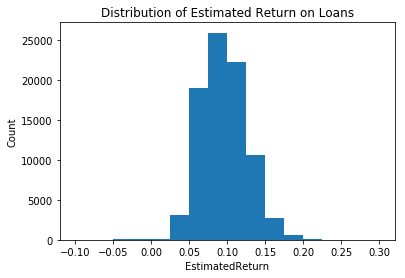

In [10]:
x= df['EstimatedReturn'].dropna().values
bins = np.arange(-0.1, df['EstimatedReturn'].max()+0.025, 0.025)
def hist(x, xlabel, ylabel, title):
     
     ax = plt.subplot(1,1,1)
     ax.hist(x, bins = bins)
     ax.set_xlabel(xlabel)
     ax.set_ylabel(ylabel)
     ax.set_title(title)
     plt.show()
hist(x, 'EstimatedReturn', 'Count', 'Distribution of Estimated Return on Loans')

It seems most loans are expected to provide returns of about 8-10%. This seems pretty standard as customers would likely shy away from high interest rates. Again, we'll later examine any correlation between this and features such as Loan Amounts taken, Loan Term, etc.

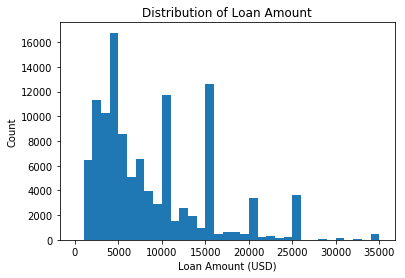

In [11]:
x= df['LoanOriginalAmount'].dropna().values
bins = np.arange(0, df['LoanOriginalAmount'].max()+1000, 1000)
hist(x, 'Loan Amount (USD)', 'Count', 'Distribution of Loan Amount')

The most common amount customers tended to borrow is USD 5,000. Also interesting to note is tendency to borrow sums to the 
nearest 5,000. (10,000, 15,000, 20,000 etc)

Let's observe the distribution of the Annual Percentage Rate for borrowers

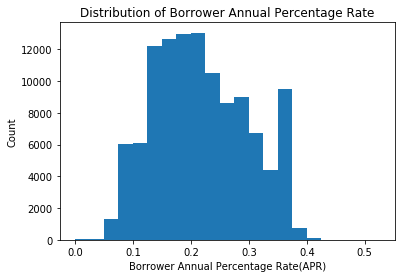

In [12]:
x= df['BorrowerAPR'].dropna().values
bins = np.arange(0, df['BorrowerAPR'].max()+0.025, 0.025)
hist(x, 'Borrower Annual Percentage Rate(APR)', 'Count', 'Distribution of Borrower Annual Percentage Rate')

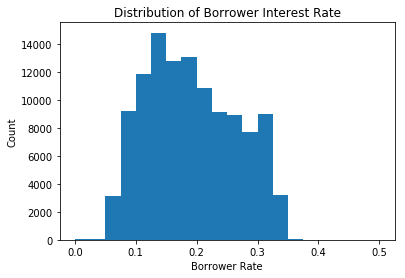

In [13]:
x= df['BorrowerRate'].dropna().values
bins = np.arange(0, df['BorrowerRate'].max()+0.025, 0.025)
hist(x, 'Borrower Rate', 'Count', 'Distribution of Borrower Interest Rate')

The distribution of the interest rate and the APR seems quite similar. To simplify the rest of the explorations, let's use the 
APR. 

Let's examine how many months it takes to pay back a loan.

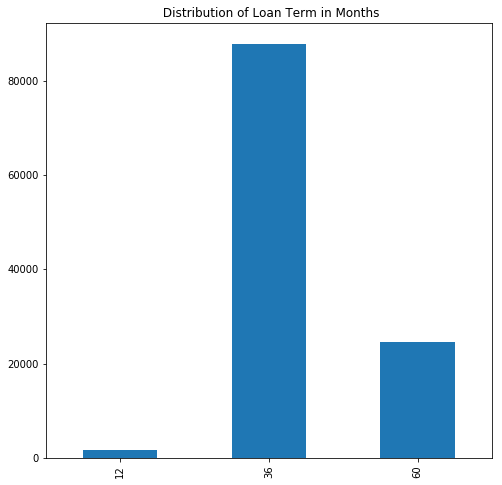

In [14]:
df['Term'].value_counts(sort = False).plot(kind='bar', color = sb.color_palette()[0], figsize = [8, 8],
                                                title=' Distribution of Loan Term in Months',)

More than half the customers prefer to pay the loan back in 36 months. Later, we'll examine the 
relationship between this variable and the amount of the loan borrowed to see if there's any correlation.

Let's visualise the distribution of the rating using a pie chart

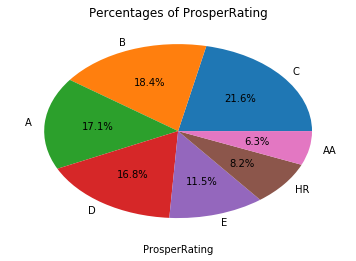

In [15]:
#Creating a pie chart to visualise the Prosper Rating as percentages 
x = df['ProsperRating (Alpha)'].value_counts()
labels = ['C', 'B', 'A', 'D', 'E', 'HR', 'AA']

def pie_plot(x,  xlabel, title):
    
     ax = plt.subplot(1,1,1)
     ax.pie(x, autopct='%1.1f%%', labels = labels)
     ax.set_xlabel(xlabel)
     ax.set_title(title)
     plt.show()
    
pie_plot(x, 'ProsperRating', 'Percentages of ProsperRating')

However, the prosper rating doesn't provide much information as it is not ordered. Let's try and get the distribution from the Prosper Score instead. 

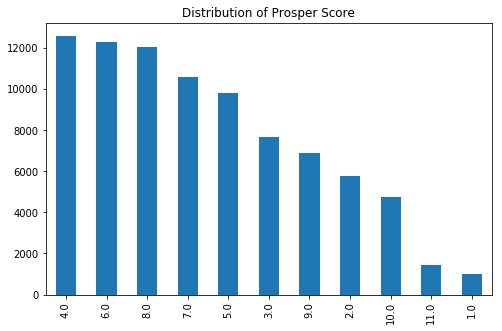

In [16]:
df['ProsperScore'].value_counts(sort = True).plot(kind='bar', color = sb.color_palette()[0], figsize = [8, 5], 
                                                title= "Distribution of Prosper Score",)

From the distribution above, it is evident that most customers are associated with an average risk in terms of paying
back the loan. It is also interesting to note that the smallest group is 1.0, hence very few customers are associated 
with extreme risk.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Initially, I was interested in the APR and the interest rate. However, their distributions are quite similar and therefore to simplify this exploration, I'll examine the relationship between other variables and just the APR.
As of this stage, for the variables I chose to examine, no transformations were necessary.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I was suprised that the loan amount distribution was skewed to the left, meaning that most borrowers take loans of less than 10,000 USD, and am keen to explore whether factors such as income range or employment status contribute to the loan amount. As of this stage, for the variables I chose to examine, no transformations were necessary.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

We'll begin by examining the effect between the Estimated Effective Yield and the Borrower APR

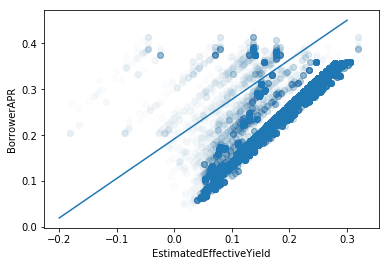

In [17]:
plt.scatter(data = df, x = 'EstimatedEffectiveYield', y = 'BorrowerAPR', alpha = 0.02);
plt.xlabel('EstimatedEffectiveYield')
plt.ylabel('BorrowerAPR')
plt.plot([-0.2, 0.3], [0.02 ,0.45]) 

It seems that there's a strong, positive correlation btween the Estimated Effective Yield and the BorrowerAPR.

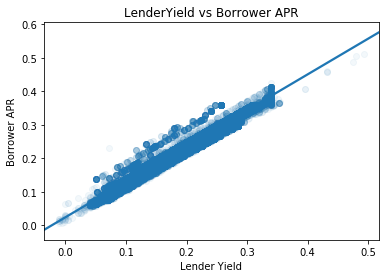

In [18]:
sb.regplot(data = df, x = 'LenderYield', y = 'BorrowerAPR', truncate=False, x_jitter=0.00003, scatter_kws={'alpha':1/20});
plt.title('LenderYield vs Borrower APR' );
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

Once again, it is evident that the Lender Yield and the Borrowers' Annual Percentage Rate is positively correlated, i.e the higher a borrower's annual percentage rate, the greater the yield(return) on the loan.

Next, let's examine if there's any correlation between the annual percentage rate for borrowers and the loan amount.

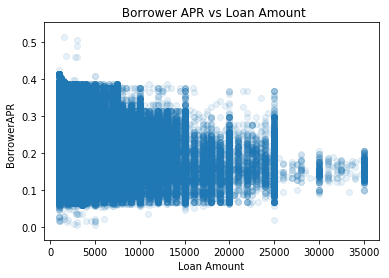

In [19]:
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 0.1);
plt.title(' Borrower APR vs Loan Amount' )
plt.xlabel('Loan Amount');
plt.ylabel('BorrowerAPR  ');

This plot indicates a slight negative correlation betweenthe two variables which means that customers who take out larger loans have lower interest rates. This may be a strategy from the bank to get customers to borrower larger amounts of loans. 

Let's examine if there's any correlation between the Prosper Score for borrowers and the loan amount.

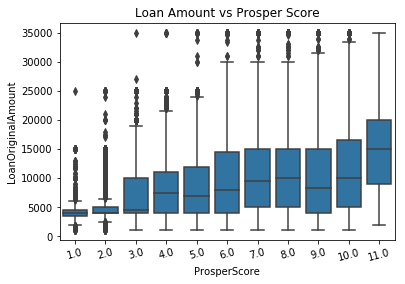

In [20]:
sb.boxplot(data=df, x='ProsperScore', y='LoanOriginalAmount', color = sb.color_palette()[0])
plt.title('Loan Amount vs Prosper Score')
plt.xticks(rotation=15);

As seen from the box plot above, and as expected,  the Prosper score (which is a a custom risk score built using historical Prosper data which ranges from 1-10, with 10 being the best, or lowest risk score)is directly proportional to the loan amount. This plot makes sense because one would expect that a customer with the lowest risk score would obtain the highest loan amount. 
It's also interesting to note the outliers on lower Prosper Scores. For example, the outlier(s) with a score of 2.0 meaning there is significant risk but still able to obtain a loan of $ 35000 +. 

Let's see if one's employment status has an effect on the Loan Amount.

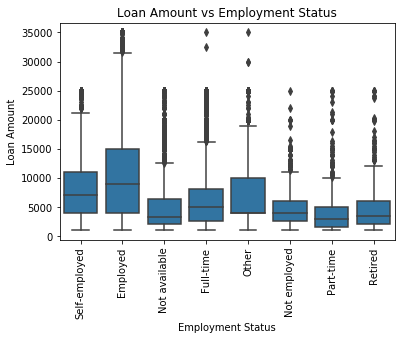

In [21]:
sb.boxplot(data=df, x='EmploymentStatus', y='LoanOriginalAmount', color = sb.color_palette()[0])

plt.xticks(rotation=90);
plt.title('Loan Amount vs Employment Status' );
plt.xlabel('Employment Status');
plt.ylabel('Loan Amount');

Evidently, employed people take out/ are eligible for the highest amount of loans. 

Let's examine if one's income range has an effect on the Loan Amount.

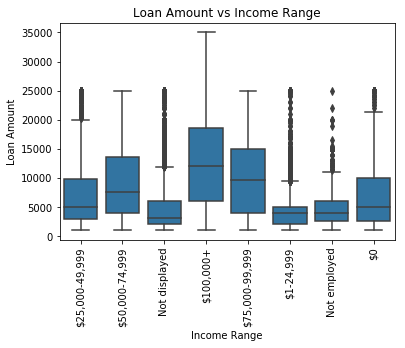

In [22]:
sb.boxplot(data=df, x='IncomeRange', y='LoanOriginalAmount', color = sb.color_palette()[0])
plt.xticks(rotation=90);
plt.title('Loan Amount vs Income Range' );
plt.xlabel('Income Range');
plt.ylabel('Loan Amount');

To a certain extent, income range is directly proportional to the loan amount. We can see that the highest loan amounts are taken by customers who earn USD 100, 000+, followed by those who earn between 75,000 - 99,999 and so on. However it is also interesting to note that customers who earn no income are alos eligible for a significant amount in loans (up to USD 10,000)

Let's observe the relationship between the loan amount and the term take to repay the loan.

Text(0.5,1,'Loan Amount vs Term(months)')

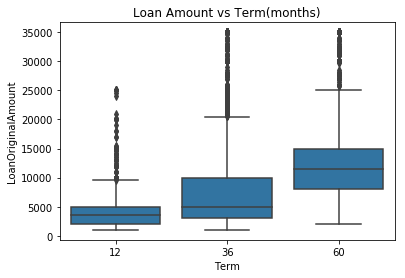

In [23]:
sb.boxplot(data=df, x='Term', y='LoanOriginalAmount', color = sb.color_palette()[0])
plt.title('Loan Amount vs Term(months)')

As expected, term is directly proportional to the Loan Amount. This is intuitive because the larger the amount, the more likely that one would need a longer period of time to pay it off. 

Is there a correlation between the Listing Category (the reason the loan was taken) and the amount borrowed?

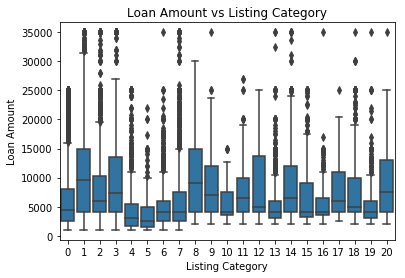

In [24]:
sb.boxplot(data=df, x='ListingCategory (numeric)', y='LoanOriginalAmount', color = sb.color_palette()[0]);
plt.title('Loan Amount vs Listing Category');
plt.xlabel('Listing Category');
plt.ylabel('Loan Amount');

The listing categories as they are do not provide us with much information. Let's replace the numeric values with the categories that they represent.

In [25]:
df2 = df.copy()

In [26]:
df2['ListingCategory (numeric)']=df2['ListingCategory (numeric)'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                15, 16, 17, 18, 19, 20],
                                ['Not Available', 'Debt Consolidation', 'Home Improvement','Business', 'Personal Loan', 
                                'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 
                                'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 
                                'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'])


In [27]:
df2.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)
#df2.info()

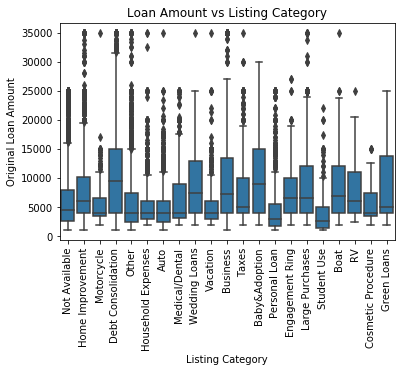

In [28]:
# plt.figure(figsize=[8, 5]);
sb.boxplot(data=df2, x='ListingCategory', y='LoanOriginalAmount', color = sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.title('Loan Amount vs Listing Category');
plt.xlabel ('Listing Category');
plt.ylabel ('Original Loan Amount');

From this plot, it is clear that the top categories that largest loan amounts are for the following reasons:
1. Debt Consolidation
2. Wedding Loans
3. Baby & Adoption

This either means that these categories are expensive, e.g.Weddings in the United States are known to be quite costly, or it could also mean that a large number of the population is taking up loans for these reasons. 

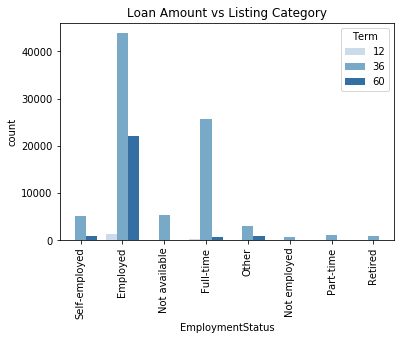

In [29]:
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation = 90);
plt.title('Loan Amount vs Listing Category');

Regardless of employement status, it is evident that most people do not opt for a 12 month term. 36 months was the most popular term followed by 60 months. It's also interesting to note that 60 months is remarkably common among employed customers. This is likely due to the fact that they have a consistent income stream and would be able to sustain payments over a longer period of time.

Let's explore whether there's any correlation between the term and the income range for the borrower.

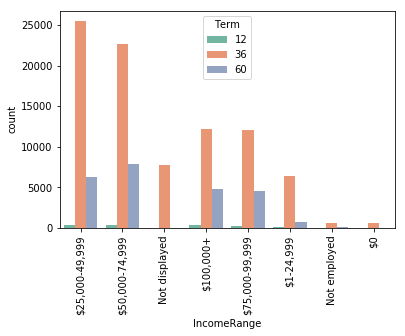

In [30]:
sb.countplot(data = df, x = 'IncomeRange', hue = 'Term', palette = 'Set2');
plt.xticks(rotation = 90);


Similarly, at each income level, there is a clear order of preference with respect to the preferred term for loan repayment. That is, most people prefer a 36 month term, some people opt for a 60 month term, and very few people opt for a 12 month term. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>As  as expected, the Prosper score is directly proportional to the loan amount. This means because that a customer with the lowest risk score would obtain the highest loan amount. 
It was evident also that the Lender Yield and Estimated Effective Yield are both positively correlated with the APR i.e the higher a borrower's annual percentage rate, the greater the yield(return) on the loan.
Another notable factor was that the loan term was not directly proportional to either income range or employment status. Regardless of the employment status and / or income range, most customers opted for a 36 month term.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Employed people take out/ are eligible for the highest amount of loans. To a certain extent, income range is directly proportional to the loan amount. We observed that the highest loan amounts are taken by customers who earn USD 100, 000+, followed by those who earn between 75,000 - 99,999 and so on. However it was also interesting to note that customers who earn no income are also eligible for a significant amount in loans (up to USD 10,000)

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

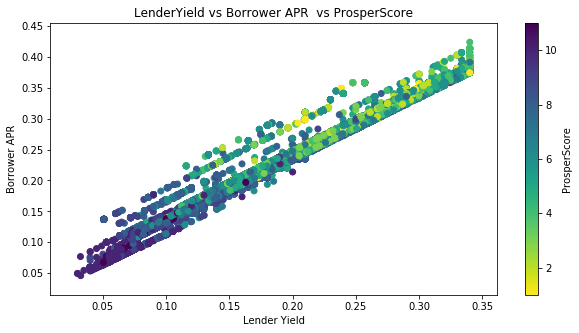

In [31]:
plt.figure(figsize = [10, 5])
plt.scatter(data=df,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield vs Borrower APR  vs ProsperScore');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

We observe that prosper score is negatively correlated with the APR. This is likely due to the fact that customers with lower risk classifications are offered lower annual percentage rates. 

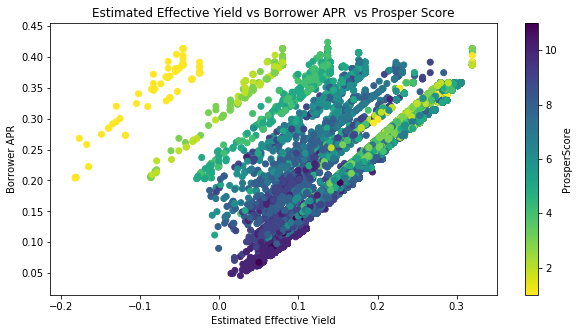

In [32]:
plt.figure(figsize = [10, 5])
plt.scatter(data=df,x='EstimatedEffectiveYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('Estimated Effective Yield vs Borrower APR  vs Prosper Score');
plt.xlabel('Estimated Effective Yield');
plt.ylabel('Borrower APR');

As with the previous plot, we observe that prosper score is largely, negatively correlated with the APR. This is likely due to the fact that customers with lower risk classifications are offered lower annual percentage rates.

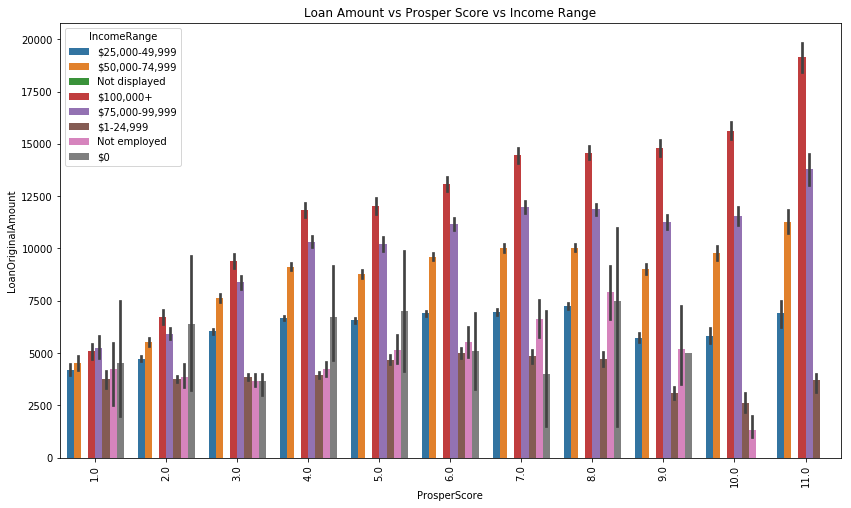

In [33]:
plt.figure(figsize=[14, 8])
ax = sb.barplot(data = df, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IncomeRange')
plt.title('Loan Amount vs Prosper Score vs Income Range')
plt.xticks(rotation=90);

From the above plot, we can observe that at each Prosper Rating, customers who make USD 100,000 + are able to obtain/ take out larger loan amounts. 
Additionally, this plot confirms the direct proportionality between the loan amount obtained and the prosper score rating(i.e the highest loan amounts are obtained by those with the lowest risk classification.)


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Using multivariate plots the relationship between the original amount, the Propser Score and the income range was analysed. The correlation between the amount and the income range was as observed in the previous section with customers earning USD 100, 000 + obtaining the highest amount of loans. We observed that prosper score is negatively correlated with the APR. This is likely due to the fact that customers with lower risk classifications are offered lower annual percentage rates.

### Were there any interesting or surprising interactions between features?

> Yes it was interesting to observe that even users who's income was 0 USD were able to get loans, and sometimes larger amounts than users with a higher income range. 